<a href="https://colab.research.google.com/github/malothro-m/Second-Hand-Car-Price-Prediction-with-Neural-Networks/blob/main/Car_Price_Prediction_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

%matplotlib inline
pd.set_option("display.max_rows",None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
df = pd.read_csv("/content/drive/MyDrive/colab/car data.csv" , sep= ",")

In [23]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Exploratory Data Analysis

In [24]:
df.shape

(301, 9)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [26]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [27]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Data Preprocessing

In [29]:
df['Age'] = 2024 - df['Year']
df.drop('Year', axis=1, inplace=True)

In [30]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [31]:
df.rename(columns = {'Selling_Price':'Selling_Price(lacs)', 'Present_Price':'Present_Price(lacs)', 'Owner':'Past_Owners'}, inplace=True)

In [32]:
df.head()

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [33]:
df.columns

Index(['Car_Name', 'Selling_Price(lacs)', 'Present_Price(lacs)', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owners', 'Age'],
      dtype='object')

# Visualizing the data

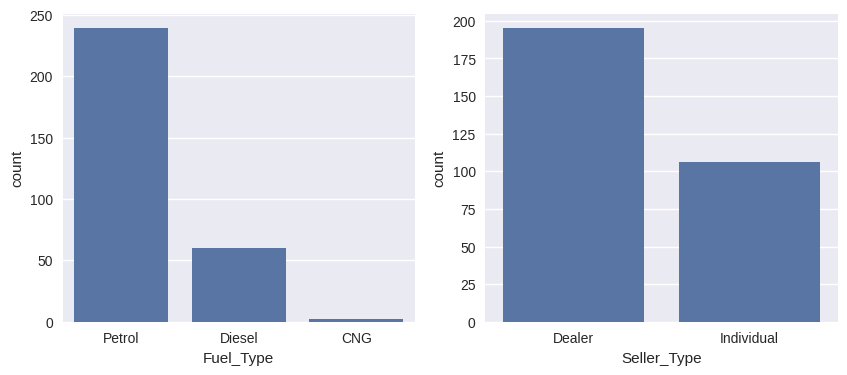

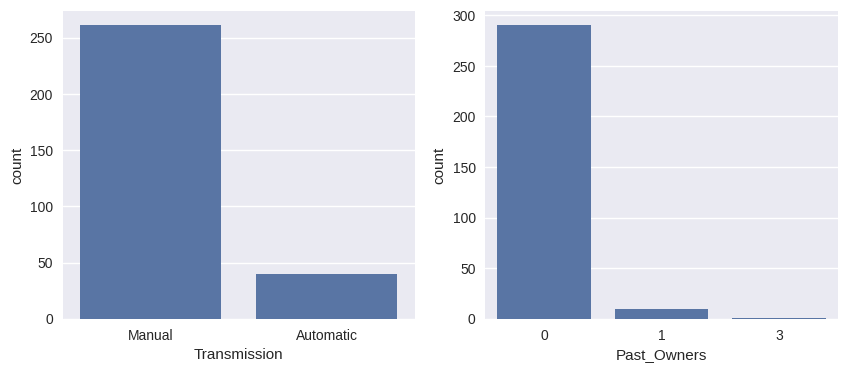

In [37]:
cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owners']
i = 0
while i < 4:
    fig = plt.figure(figsize=[10,4])

    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    i +=1

    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1

    plt.show()

In [39]:
df[df['Present_Price(lacs)']>df['Present_Price(lacs)'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,7
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,14


In [40]:
df[df['Selling_Price(lacs)'] > df['Selling_Price(lacs)'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
63,fortuner,23.5,35.96,47000,Diesel,Dealer,Automatic,0,9
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,7
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,14


In [41]:
df[df['Kms_Driven'] > df['Kms_Driven'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
84,innova,3.49,13.46,197176,Diesel,Dealer,Manual,0,19
179,Honda Karizma,0.31,1.05,213000,Petrol,Individual,Manual,0,14
196,Activa 3g,0.17,0.52,500000,Petrol,Individual,Automatic,0,16


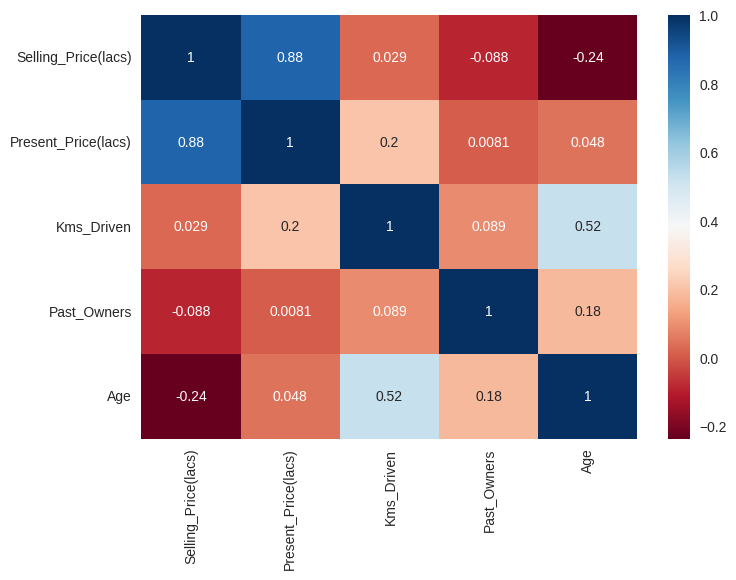

In [47]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])  # Extract numeric columns

sns.heatmap(numeric_df.corr(), annot=True, cmap='RdBu')
plt.show()


In [51]:
df.corr(numeric_only=True)['Selling_Price(lacs)']

Selling_Price(lacs)    1.000000
Present_Price(lacs)    0.878983
Kms_Driven             0.029187
Past_Owners           -0.088344
Age                   -0.236141
Name: Selling_Price(lacs), dtype: float64

In [53]:
df.pivot_table(values='Selling_Price(lacs)', index = 'Seller_Type', columns='Fuel_Type')

Fuel_Type,CNG,Diesel,Petrol
Seller_Type,,,
Dealer,3.1,10.181525,5.252388
Individual,NaN,16.000000,0.726857


In [54]:
# Creating dummies for categorical values
df.drop(labels='Car_Name', axis=1, inplace = True)


In [55]:
df.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [56]:
df = pd.get_dummies(data=df, drop_first=True)

In [57]:
df.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Past_Owners,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,False,True,False,True
1,4.75,9.54,43000,0,11,True,False,False,True
2,7.25,9.85,6900,0,7,False,True,False,True
3,2.85,4.15,5200,0,13,False,True,False,True
4,4.60,6.87,42450,0,10,True,False,False,True


# Train - Test - Split

In [58]:
# Train Test Split
X = df.iloc[:,1:].values
y = df.iloc[:,:1].values

In [59]:
print(X)

[[5.59 27000 0 ... True False True]
 [9.54 43000 0 ... False False True]
 [9.85 6900 0 ... True False True]
 ...
 [11.0 87934 0 ... True False True]
 [12.5 9000 0 ... False False True]
 [5.9 5464 0 ... True False True]]


In [85]:
# print(y)

In [61]:
print(X.shape, y.shape)

(301, 8) (301, 1)


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

# Scaling the data for better training

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [64]:
print(X.shape, X_train.shape, X_test.shape)

(301, 8) (240, 8) (61, 8)


In [65]:
print(y.shape, y_train.shape, y_test.shape)

(301, 1) (240, 1) (61, 1)


# Building Artifical Neural Network

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import utils
from tensorflow.keras.layers import Dense

In [67]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1)) # O/P

model.compile(optimizer='rmsprop', loss='mse')

In [68]:
model.fit(X_train, y_train, epochs=100, validation_data=(X_test,y_test))

Epoch 1/100
8/8 [==============================] - 1s 32ms/step - loss: 46.8513 - val_loss: 38.5466
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 44.1315 - val_loss: 36.4842
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 42.0660 - val_loss: 34.5281
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 40.0091 - val_loss: 32.3412
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 37.7896 - val_loss: 30.3664
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 35.6582 - val_loss: 28.2588
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 33.4754 - val_loss: 26.1625
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 31.3476 - val_loss: 24.1815
Epoch 9/100
8/8 [==============================] - 0s 9ms/step - loss: 29.2500 - val_loss: 22.2547
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 27.1069 - val_loss: 20.2249
Epoch 11

In [69]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 591 (2.31 KB)
Trainable params: 591 (2.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

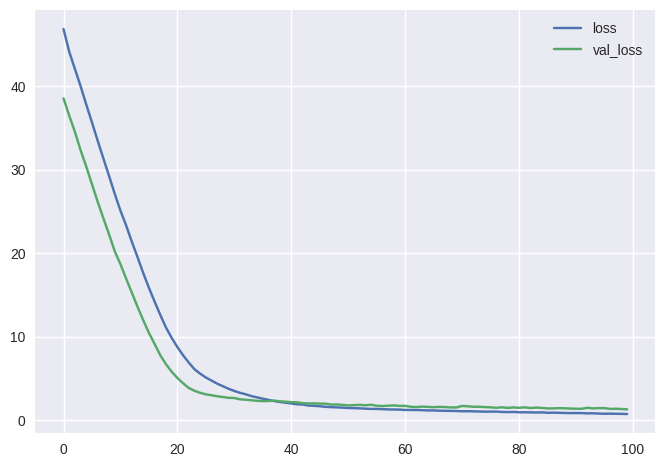

In [71]:
loss_df.plot()

# Model Evaluation

In [72]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 1.3056


1.3056485652923584

## model.predict() on X_test

In [73]:
train_pred = model.predict(X_train)
# print(pred_train)

8/8 [==============================] - 0s 2ms/step


## model.predict()  on X_train

In [74]:
test_pred = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [76]:
from sklearn.metrics import r2_score

- R Squared : R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

In [77]:
r2_train = r2_score(y_train, train_pred)
print("R Squared value of train dataL: ",r2_train)

R Squared value of train dataL:  0.9734899167313992


In [78]:
r2_test = r2_score(y_test, test_pred)
print("R Squared value of test data:", r2_test)

R Squared value of test data: 0.9398157170089859


In [79]:
diff_r2_scores = r2_train - r2_test

In [80]:
print("Difference between two scores: ", diff_r2_scores.round(2))

Difference between two scores:  0.03
